# 3 layer LSTM Encoder Decoder, dropout. 30 day input, 7 day forecast

In [6]:
import numpy as np
import pandas as pd
import json
import os
import math
import datetime as dt
import matplotlib.pyplot as plt
from numpy import newaxis
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, LSTM, CuDNNLSTM, BatchNormalization, RepeatVector, TimeDistributed
from keras.models import Sequential, load_model
from sklearn.metrics import mean_squared_error, accuracy_score
from keras import regularizers

import utils
import model_funcs

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [16, 9]
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
save_dir = 'models/lstm4.3'
df = pd.read_csv('data_25_normalized.csv', index_col='Date')
data = df.values

In [16]:
num_input = 30
num_out = 1
train_X, train_y, dev_X, dev_y, test_X, test_y, train_y_acc, dev_y_acc, test_y_acc = utils.prepare_data(data, num_input, num_preds=num_out)

# train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
# dev_y = dev_y.reshape((dev_y.shape[0], dev_y.shape[1], 1))
# test_y = test_y.reshape((test_y.shape[0], test_y.shape[1], 1))
# train_y_acc = train_y_acc.reshape((train_y.shape[0], train_y.shape[1], 1))
# dev_y_acc = dev_y_acc.reshape((dev_y.shape[0], dev_y.shape[1], 1))
# test_y_acc = test_y_acc.reshape((test_y.shape[0], test_y.shape[1], 1))

print("train_X shape", train_X.shape)
print("train_y shape", train_y.shape)
print("dev_X shape", dev_X.shape)
print("dev_y shape", dev_y.shape)
print("test_X shape", test_X.shape)
print("test_y shape", test_y.shape)
print("train_y_acc shape", train_y_acc.shape)
print("dev_y_acc shape", dev_y_acc.shape)
print("test_y_acc shape", test_y_acc.shape)


train_X shape (642, 30, 25)
train_y shape (642, 1)
dev_X shape (80, 30, 25)
dev_y shape (80, 1)
test_X shape (81, 30, 25)
test_y shape (81, 1)
train_y_acc shape (642, 1)
dev_y_acc shape (80, 1)
test_y_acc shape (81, 1)


In [17]:
if not os.path.exists(save_dir): os.makedirs(save_dir)

input_shape = train_X.shape[1:]
lr = 0.001
decay = 1e-6
dropout_rate = 0.3
epochs = 200
batch_size = 32

model = Sequential()
model.add(CuDNNLSTM(200, input_shape=input_shape, return_sequences=True, kernel_regularizer=regularizers.l2(0.001)))
model.add(CuDNNLSTM(200, kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)))

opt = Adam(lr=lr, decay=decay)
model.compile(loss="binary_crossentropy", optimizer=opt)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_5 (CuDNNLSTM)     (None, 30, 200)           181600    
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 200)               321600    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 523,401
Trainable params: 523,401
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model_funcs.train(
    model,
    train_X,
    train_y_acc,
    (dev_X, dev_y_acc),
    epochs = epochs,
    batch_size = batch_size,
    save_dir = save_dir
)

[Model] Training Started
[Model] 200 epochs, 32 batch size
Instructions for updating:
Use tf.cast instead.
Train on 642 samples, validate on 80 samples
Epoch 1/200
642/642 [==============================] - 3s 5ms/step - loss: 1.0857 - val_loss: 1.0524
Epoch 2/200
642/642 [==============================] - 0s 649us/step - loss: 0.9291 - val_loss: 0.8844
Epoch 3/200
642/642 [==============================] - 0s 605us/step - loss: 0.8386 - val_loss: 0.8264
Epoch 4/200
642/642 [==============================] - 0s 576us/step - loss: 0.7998 - val_loss: 0.7954
Epoch 5/200
642/642 [==============================] - 0s 573us/step - loss: 0.7710 - val_loss: 0.7850
Epoch 6/200
642/642 [==============================] - 0s 572us/step - loss: 0.7536 - val_loss: 0.7642
Epoch 7/200
642/642 [==============================] - 0s 572us/step - loss: 0.7402 - val_loss: 0.7741
Epoch 8/200
642/642 [==============================] - 0s 577us/step - loss: 0.7364 - val_loss: 0.7491
Epoch 9/200
642/642 [=====

642/642 [==============================] - 0s 580us/step - loss: 0.6908 - val_loss: 0.7017
Epoch 77/200
642/642 [==============================] - 0s 573us/step - loss: 0.6901 - val_loss: 0.7027
Epoch 78/200
642/642 [==============================] - 0s 576us/step - loss: 0.6899 - val_loss: 0.7033
Epoch 79/200
642/642 [==============================] - 0s 570us/step - loss: 0.6895 - val_loss: 0.7036
Epoch 80/200
642/642 [==============================] - 0s 575us/step - loss: 0.6893 - val_loss: 0.7050
Epoch 81/200
642/642 [==============================] - 0s 585us/step - loss: 0.6893 - val_loss: 0.7071
Epoch 82/200
642/642 [==============================] - 0s 595us/step - loss: 0.6888 - val_loss: 0.7073
Epoch 83/200
642/642 [==============================] - 0s 581us/step - loss: 0.6890 - val_loss: 0.7025
Epoch 84/200
642/642 [==============================] - 0s 582us/step - loss: 0.6890 - val_loss: 0.7032
Epoch 85/200
642/642 [==============================] - 0s 575us/step - loss:

642/642 [==============================] - 0s 580us/step - loss: 0.6874 - val_loss: 0.7107
Epoch 155/200
642/642 [==============================] - 0s 582us/step - loss: 0.6873 - val_loss: 0.7120
Epoch 156/200
642/642 [==============================] - 0s 588us/step - loss: 0.6872 - val_loss: 0.7066
Epoch 157/200
642/642 [==============================] - 0s 587us/step - loss: 0.6871 - val_loss: 0.7088
Epoch 158/200
642/642 [==============================] - 0s 582us/step - loss: 0.6872 - val_loss: 0.7058
Epoch 159/200
642/642 [==============================] - 0s 579us/step - loss: 0.6871 - val_loss: 0.7077
Epoch 160/200
642/642 [==============================] - 0s 576us/step - loss: 0.6872 - val_loss: 0.7069
Epoch 161/200
642/642 [==============================] - 0s 574us/step - loss: 0.6884 - val_loss: 0.7120
Epoch 162/200
642/642 [==============================] - 0s 574us/step - loss: 0.6874 - val_loss: 0.7063
Epoch 163/200
642/642 [==============================] - 0s 573us/ste

In [37]:
predicted_train = model.predict(train_X).reshape(-1,1)
prepredicted_train_binary = np.array(predicted_train > 0.5, dtype=np.int32)
print('Train Acc:', accuracy_score(prepredicted_train_binary, true_train))

predicted_dev = model.predict(dev_X).reshape(-1,1)
prepredicted_dev_binary = np.array(predicted_dev > 0.5, dtype=np.int32)
true_dev = dev_y_acc.reshape(-1,1)
print('Dev Acc:', accuracy_score(prepredicted_dev_binary, true_dev))

predicted_test = model.predict(test_X).reshape(-1,1)
prepredicted_test_binary = np.array(predicted_test > 0.5, dtype=np.int32)
true_test = test_y_acc.reshape(-1,1)
print('Test Acc:', accuracy_score(prepredicted_test_binary, true_test))

Train Acc: 0.5560747663551402
Dev Acc: 0.4625
Test Acc: 0.6049382716049383


Acc Score: 6.814485325324328e-09
Acc Dev: 0.6582278481012658
Acc Test: 0.6625


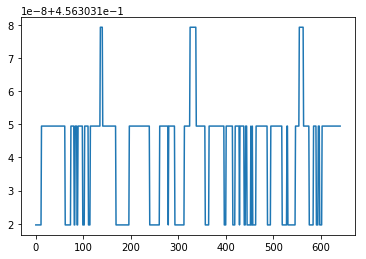

In [34]:
train_scores = utils.get_scores(predicted_train, train_y, num_out)
# plt.plot(train_scores)
plt.plot(predicted_train)
# plt.plot(train_y)
print("Acc Score:", np.sum(train_scores))
print("Acc Dev:", utils.direction_accuracy(predicted_dev, true_dev))
print("Acc Test:", utils.direction_accuracy(predicted_test, true_test))

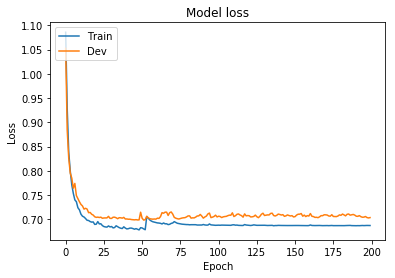

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Dev'], loc='upper left')
plt.show()